###### CREDIT CARD SPEND PREDICTION & IDENTIFY DRIVERS FOR SPEND

In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.metrics import mean_squared_error

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
#from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 432x216 with 0 Axes>

In [2]:
data = pd.read_excel('Data Set.xlsx',sep=';')

In [3]:
data.head(2)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0


In [4]:
#profile_report = pandas_profiling.ProfileReport(data)

In [5]:
#profile_report.to_file('profile_report.html')

In [6]:
#checking missing values 
sum(data.isnull().sum())

22003

In [7]:
#checking cloumns and dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [8]:
data.shape

(5000, 130)

## Data Analysis

In [9]:
# printing all cloumns data set 
data.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

In [10]:
data.isnull().any().value_counts()

False    115
True      15
dtype: int64

In [11]:
data.duplicated().value_counts()

False    5000
dtype: int64

In [12]:
data.cardspent.head()

0     81.66
1     42.60
2    184.22
3    340.99
4    255.10
Name: cardspent, dtype: float64

In [13]:
data.card2spent.head()

0     67.80
1     34.94
2    175.75
3     18.42
4    252.73
Name: card2spent, dtype: float64

In [14]:
# Adding a new column total spend & dropping the summarised columns
data['Total_spend']=data.cardspent+data.card2spent

In [15]:
del data['cardspent']

In [16]:
del data['card2spent']

In [17]:
data.head(2)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_spend
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,1,1,0,0,0,1,0,149.46
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,0,0,0,77.54


In [18]:
data.shape

(5000, 129)

In [19]:
# Univarite Analysis:

In [20]:
# Bivariate Analysis:

# Data Preparation 1

In [21]:
#droping columns which are highly correlated
data.drop(['addresscat','agecat','card2tenurecat','cardtenure','cardtenurecat','commutecat','edcat','equipmon','lncardmon','lnequipmon','lninc','lnlongten','lntollten','lnwireten','longten','spoused','spousedcat','tenure','tollmon','wiremon'],axis=1,inplace=True)

In [22]:
data.shape

(5000, 109)

In [23]:
data.drop(['custid'],axis=1 ,inplace=True)

In [24]:
data.shape

(5000, 108)

In [25]:
data.columns.values

array(['region', 'townsize', 'gender', 'age', 'birthmonth', 'ed',
       'jobcat', 'union', 'employ', 'empcat', 'retire', 'income',
       'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt',
       'lnothdebt', 'default', 'jobsat', 'marital', 'reside', 'pets',
       'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles',
       'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown',
       'hometype', 'address', 'cars', 'carown', 'cartype', 'carvalue',
       'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutetime',
       'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus',
       'commuterail', 'commutepublic', 'commutebike', 'commutewalk',
       'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty',
       'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee',
       'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure',
       'active', 'bfast', 'churn', 'longmon', 'lnlongmon', 'tollfree',
       'lntollmon', 'toll

In [26]:
cat_var =['region',
'townsize',
'gender',
'birthmonth',
'jobcat',
'union',
'employ',
'empcat',
'retire',
'inccat',
'default',
'jobsat',
'marital',
'homeown',
'hometype',
'address',
'cars',
'carown',
'cartype',
'carcatvalue',
'carbought',
'carbuy',
'commute',
'commutecar',
'commutemotorcycle',
'commutecarpool',
'commutebus',
'commuterail',
'commutepublic',
'commutebike',
'commutewalk',
'commutenonmotor',
'telecommute',
'reason',
'polview',
'polparty',
'polcontrib',
'vote',
'card',
'cardtype',
'cardbenefit',
'cardfee',
'card2',
'card2type',
'card2benefit',
'card2fee',
'card2tenure',
'active',
'bfast',
'churn',
'tollfree',
'equip',
'callcard',
'wireless',
'multline',
'voice',
'pager',
'internet',
'callid',
'callwait',
'forward',
'confer',
'ebill',
'owntv',
'ownvcr',
'owndvd',
'owncd',
'ownpda',
'ownpc',
'ownipod',
'owngame',
'ownfax',
'news',
'response_01',
'response_02',
'response_03',
]

In [27]:
num_var =['age','Total_spend',
'ed',
'income',
'debtinc',
'creddebt',
'lncreddebt',
'othdebt',
'lnothdebt',
'reside',
'pets',
'pets_cats',
'pets_dogs',
'pets_birds',
'pets_reptiles',
'pets_small',
'pets_saltfish',
'pets_freshfish',
'carvalue',
'commutetime',
'longmon',
'lnlongmon',
'lntollmon',
'tollten',
'equipten',
'lnequipten',
'cardmon',
'cardten',
'lncardten',
'lnwiremon',
'wireten',
'hourstv',
]

In [28]:
for i in cat_var:
    data[i]=data[i].astype('object')

In [29]:
data.dtypes

region          object
townsize        object
gender          object
age              int64
birthmonth      object
                ...   
news            object
response_01     object
response_02     object
response_03     object
Total_spend    float64
Length: 108, dtype: object

In [30]:
data_num = data[num_var]
data_cat = data[cat_var]

#### Alternative method to split the numerical & categorical dynamically(if categarical is correct dtypes)

In [31]:
#####################################################################################################################

In [32]:
data_num.shape

(5000, 32)

In [33]:
data_cat.shape

(5000, 76)

In [34]:
data.shape

(5000, 108)

In [35]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [36]:
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,235128.00,47.02560,47.00,17.770338,315.784902,18.00,18.0000,20.000,23.000,31.0000,47.00,62.0000,72.000,76.0000,79.0000,79.00
Total_spend,5000.0,0.0,2490393.15,498.07863,414.25,351.529270,123572.827720,8.11,58.1976,133.106,184.033,276.2825,414.25,615.5625,908.125,1145.1465,1760.1024,4881.05
ed,5000.0,0.0,72715.00,14.54300,14.00,3.281083,10.765504,6.00,8.0000,9.000,10.000,12.0000,14.00,17.0000,19.000,20.0000,21.0000,23.00
income,5000.0,0.0,273798.00,54.75960,38.00,55.377511,3066.668742,9.00,9.0000,13.000,16.000,24.0000,38.00,67.0000,109.100,147.0000,272.0100,1073.00
debtinc,5000.0,0.0,49770.80,9.95416,8.80,6.399783,40.957226,0.00,0.7000,1.900,2.800,5.1000,8.80,13.6000,18.600,22.2000,29.2000,43.10


In [37]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=data_cat.apply(cat_summary)

In [38]:
cat_summary

,region,townsize,gender,birthmonth,jobcat,union,employ,empcat,retire,inccat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
N,5000,4998,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
NMISS,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ColumnsNames,5 1027 1 1009 3 1003 2 995 4 ...,1.0 1436 2.0 1048 3.0 907 4.0 85...,"1 2518 0 2482 Name: gender, dtype: int64",September 458 May 451 January ...,2 1640 1 1388 6 688 3 620 5 ...,"0 4244 1 756 Name: union, dtype: int64",0 659 1 389 2 318 3 309 4 ...,2 1180 5 1135 1 1048 3 968 4 ...,"0 4262 1 738 Name: retire, dtype: int64",2 1797 1 1330 3 839 4 650 5 ...,...,"1 4664 0 336 Name: owncd, dtype: int64","0 3995 1 1005 Name: ownpda, dtype: int64","1 3164 0 1836 Name: ownpc, dtype: int64","0 2604 1 2396 Name: ownipod, dtype: int64","0 2626 1 2374 Name: owngame, dtype: int64","0 4106 1 894 Name: ownfax, dtype: int64","0 2637 1 2363 Name: news, dtype: int64","0 4582 1 418 Name: response_01, dtype: ...","0 4351 1 649 Name: response_02, dtype: ...","0 4487 1 513 Name: response_03, dtype: ..."


In [39]:
#Handling Missings & Outliers

In [40]:
def missing_cat(x):
    t = x.value_counts()
    x[x==-1] = t.index[0]
    return x

def missing_num(x):
    x = x.fillna(x.median())
    return x

def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [41]:
data_cat_new=data_cat.apply(missing_cat)
data_num_new=data_num.apply(missing_num)''
data_num_new=data_num.apply(outlier_capping)

In [42]:
#data_num_new.describe().T.to_csv('outlier countinous.csv')

In [43]:
data_cat_new.head(1)

,region,townsize,gender,birthmonth,jobcat,union,employ,empcat,retire,inccat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,September,1,1,0,1,0,2,...,0,0,0,1,1,0,0,0,1,0


In [44]:
# Now we should differentiate nominal and ordinal in categorical

In [45]:
cat_ordinal=['townsize','jobcat','employ','empcat','inccat','jobsat','cars','carcatvalue',
         'commute','card2tenure','cardtype','cardbenefit','card2type','card2benefit',]


In [46]:
cat_ordinal_data=data_cat_new[cat_ordinal]

In [47]:
for i in cat_ordinal:
    cat_ordinal_data[i]=cat_ordinal_data[i].astype('object')

In [48]:
cat_ordinal_data.dtypes

townsize        object
jobcat          object
employ          object
empcat          object
inccat          object
jobsat          object
cars            object
carcatvalue     object
commute         object
card2tenure     object
cardtype        object
cardbenefit     object
card2type       object
card2benefit    object
dtype: object

In [49]:
cat_nominal=['region',
'gender',
'birthmonth',
'union',
'retire',
'default',
'marital',
'homeown',
'hometype',
'carown',
'cartype',
'carbought',
'carbuy',
'commutecar',
'commutemotorcycle',
'commutecarpool',
'commutebus',
'commuterail',
'commutepublic',
'commutebike',
'commutewalk',
'commutenonmotor',
'telecommute',
'reason',
'polview',
'polparty',
'polcontrib',
'vote',
'card',
'cardfee',
'card2',
'card2fee',
'active',
'bfast',
'churn',
'tollfree',
'equip',
'callcard',
'wireless',
'multline',
'voice',
'pager',
'internet',
'callid',
'callwait',
'forward',
'confer',
'ebill',
'owntv',
'ownvcr',
'owndvd',
'owncd',
'ownpda',
'ownpc',
'ownipod',
'owngame',
'ownfax',
'news',
'response_01',
'response_02',
'response_03',
]

In [50]:
cat_nominal_data=data_cat_new[cat_nominal]

In [51]:
for i in cat_nominal:
    cat_nominal_data[i]=cat_nominal_data[i].astype('object')

In [52]:
data_cat_nomi_dum = pd.get_dummies(cat_nominal_data, drop_first=True)

In [53]:
final_data = pd.concat([data_num_new, data_cat_nomi_dum,cat_ordinal_data], axis=1)

In [54]:
final_data.shape

(5000, 140)

In [55]:
final_data.isnull().any().value_counts()

False    131
True       9
dtype: int64

In [56]:
null_columns=final_data.columns[final_data.isnull().any()]
final_data[null_columns].isnull().sum()

lncreddebt        1
lnothdebt         1
commutetime       2
lntollmon      2622
lnequipten     3296
cardten           2
lncardten      1422
lnwiremon      3656
townsize          2
dtype: int64

In [57]:
final_data.isnull().sum()

age             0
Total_spend     0
ed              0
income          0
debtinc         0
               ..
card2tenure     0
cardtype        0
cardbenefit     0
card2type       0
card2benefit    0
Length: 140, dtype: int64

In [58]:
def missing_num(x):
    x = x.fillna(x.mean())
    return x

def missing_cat(x):
    t = x.value_counts()
    x[x==-1] = t.index[0]
    return x


In [59]:
final_data1 = final_data.apply(missing_num)

In [60]:
null_columns=final_data1.columns[final_data1.isnull().any()]
final_data1[null_columns].isnull().sum()

Series([], dtype: float64)

In [61]:
final_data1.shape

(5000, 140)

# Linear Regression

#### Checking for 1st assumption Y is normal / not

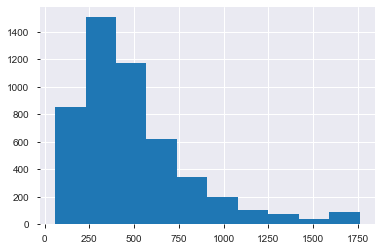

In [62]:
#Checking the Distribution of Credit_Amount
# Target variable following Exponential distribution.
final_data1.Total_spend.hist()

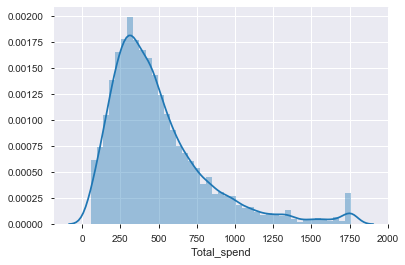

In [63]:
#
sns.distplot(final_data1.Total_spend)

In [64]:
# Since the Y is skewed we shall go for log transformation
final_data1['ln_Y'] = np.log(final_data1.Total_spend)

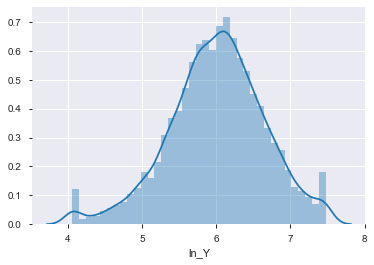

In [65]:
#Plotting transformed dependent variable
sns.distplot(final_data1.ln_Y) # The distribution looks kkk

In [66]:
final_data1.head(2)

,age,Total_spend,ed,income,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,reside,...,jobsat,cars,carcatvalue,commute,card2tenure,cardtype,cardbenefit,card2type,card2benefit,ln_Y
0,20,149.46,15,31.0,11.1,1.200909,0.183079,2.240091,0.806516,3,...,1,2,1,8,3,1,1,3,1,5.007029
1,22,77.54,17,15.0,18.6,1.222020,0.200505,1.567980,0.449788,2,...,1,2,1,1,4,4,1,1,3,4.350794


In [67]:
# Checking Co-relation of x-variables
#corrm=data_num_new.corr()
#corrm.to_csv('corrm.csv')

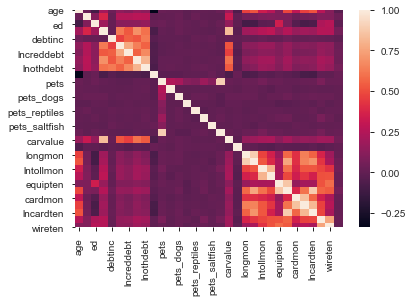

In [68]:
sns.heatmap(data_num_new.corr())

In [69]:
# From above its noted that there is very low co-relation between Y & X variables

In [70]:
# To check co-relation of Y & X through dataframe & selecting the top 10
column_names = pd.Series(list(data_num_new.corrwith(data_num_new.Total_spend).index),name='Column_Names')
r_values =  pd.Series(list(data_num_new.corrwith(data_num_new.Total_spend)),name='r_values')
corr = pd.concat([column_names,r_values],axis=1)
corr['r_values_abs'] = np.abs(corr.r_values)
corr = corr.sort_values(by=['r_values_abs'],ascending=False)


In [71]:
corr.head(10)

,Column_Names,r_values,r_values_abs
1,Total_spend,1.000000,1.000000
3,income,0.377200,0.377200
18,carvalue,0.319367,0.319367
7,othdebt,0.272972,0.272972
8,lnothdebt,0.266647,0.266647
5,creddebt,0.248547,0.248547
6,lncreddebt,0.247869,0.247869
29,lnwiremon,0.105275,0.105275
2,ed,0.100943,0.100943
30,wireten,0.100014,0.100014


In [72]:
corr.Column_Names.head(7)# Selecting top  features having co-relation greater than 0.2 

1     Total_spend
3          income
18       carvalue
7         othdebt
8       lnothdebt
5        creddebt
6      lncreddebt
Name: Column_Names, dtype: object

In [73]:
final_data1.shape

(5000, 141)

In [74]:
final_data1.head()

,age,Total_spend,ed,income,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,reside,...,jobsat,cars,carcatvalue,commute,card2tenure,cardtype,cardbenefit,card2type,card2benefit,ln_Y
0,20,149.46,15,31.0,11.1,1.200909,0.183079,2.240091,0.806516,3,...,1,2,1,8,3,1,1,3,1,5.007029
1,22,77.54,17,15.0,18.6,1.222020,0.200505,1.567980,0.449788,2,...,1,2,1,1,4,4,1,1,3,4.350794
2,67,359.97,14,35.0,9.9,0.928620,-0.074056,2.536380,0.930738,3,...,4,3,1,4,25,1,4,1,3,5.886021
3,23,359.41,16,20.0,5.7,0.033160,-3.401690,1.117200,0.110826,5,...,2,3,1,1,5,1,4,2,4,5.884464
4,26,507.83,16,23.0,1.7,0.214659,-1.538705,0.176341,-1.735336,4,...,1,1,1,6,9,2,1,3,2,6.230147


In [75]:
##############################################################################################################################

In [76]:
# To check multicollinearity

In [77]:
# from heat map there is not much high multicollinearity

In [78]:
final_data1.head(2)

,age,Total_spend,ed,income,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,reside,...,jobsat,cars,carcatvalue,commute,card2tenure,cardtype,cardbenefit,card2type,card2benefit,ln_Y
0,20,149.46,15,31.0,11.1,1.200909,0.183079,2.240091,0.806516,3,...,1,2,1,8,3,1,1,3,1,5.007029
1,22,77.54,17,15.0,18.6,1.222020,0.200505,1.567980,0.449788,2,...,1,2,1,1,4,4,1,1,3,4.350794


In [79]:
# Separating features(X-variables) & Y variable into 2 separate dataframe
features = final_data1[final_data1.columns.difference( ['ln_Y', 'Total_spend'] )]
target = final_data1['ln_Y']

In [80]:
features.isnull().any().value_counts()

False    139
dtype: int64

In [81]:
target.head()

0    5.007029
1    4.350794
2    5.886021
3    5.884464
4    6.230147
Name: ln_Y, dtype: float64

## Variable Reduction

### RFE

In [82]:
import itertools

#Checking RFE 

lm = LinearRegression()
#create the RFE model and select 10 attributes
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features, target)
select_cols = rfe.get_support()
features1=features.columns[select_cols]
pd.Series(features1)

0     card2_2
1     card2_3
2     card2_4
3     card2_5
4      card_2
5      card_3
6      card_4
7      card_5
8      inccat
9    reason_2
dtype: object

#### F - Regression

In [83]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target )

In [84]:
F_values = pd.Series(F_values)
p_values = pd.Series(p_values)
cols = pd.Series(features.columns)
f_vars = pd.concat([cols,F_values,p_values],axis=1)
f_vars.columns = ['col','f_val','p_val']
f_vars = f_vars.sort_values(by=['f_val'],ascending=False)
f_vars = f_vars.sort_values(by=['f_val'],ascending=False)
f_vars.head(10)
f_vars.col.head(10)

71          inccat
72          income
20     carcatvalue
41        carvalue
83       lnothdebt
90         othdebt
80      lncreddebt
55        creddebt
129       retire_1
92        owndvd_1
Name: col, dtype: object

### Select K-Best

In [85]:
selector = SelectKBest(f_classif, k=10)
selector.fit(features, target)
selector.get_support()
K_Best = features.columns[selector.get_support()]
pd.Series(K_Best)

0    birthmonth_August
1       birthmonth_May
2              card2_5
3               card_5
4            default_1
5               inccat
6            lncardten
7        pets_saltfish
8             reason_2
9        response_03_1
dtype: object

### VIF

In [86]:
features2 = features.astype('float64')

In [87]:
features2.dtypes.isnull().sum()

0

In [88]:
VIF = [variance_inflation_factor(features2.values,i) for i in range(features2.shape[1])]
VIF_results = pd.concat([pd.Series(features2.columns), pd.Series(VIF)],axis=1)
VIF_results.columns = ['Feature','VIF']
VIF_results = VIF_results.sort_values('VIF',ascending=False)
VIF_results2 = VIF_results.sort_values('VIF',ascending=True)
VIF_results2.Feature.head(10)

48     commutemotorcycle_1
50         commutepublic_1
126          response_01_1
118               reason_3
128          response_03_1
69              hometype_4
127          response_02_1
49       commutenonmotor_1
134                union_1
44           commutebike_1
Name: Feature, dtype: object

In [89]:
my_vars={'card2_2',
'card2_3',
'card2_4',
'card2_5',
'card_2',
'card_3',
'card_4',
'card_5',
'inccat',
'reason_2',
'inccat',
'income',
'carcatvalue',
'carvalue',
'lnothdebt',
'othdebt',
'lncreddebt',
'creddebt',
'retire_1',
'owndvd_1',
'birthmonth_August',
'birthmonth_May',
'card2_5',
'card_5',
'default_1',
'inccat',
'lncardten',
'pets_saltfish',
'reason_2',
'response_03_1',
'commutemotorcycle_1',
'commutepublic_1',
'response_01_1',
'reason_3',
'response_03_1',
'hometype_4',
'response_02_1',
'commutenonmotor_1',
'union_1',
'commutebike_1'}


In [90]:
my_vars = list(my_vars)
len(my_vars)

34

In [91]:
#### Data Preparation IV (Resampling data)
#### Preparing final data
All_Vars = my_vars + ['ln_Y']
final_data_new = final_data1.loc[:,All_Vars]


In [92]:
final_data_new.head(2)

,card2_3,card_4,union_1,card2_4,response_03_1,card_3,response_01_1,hometype_4,birthmonth_May,card2_5,...,lncardten,carvalue,response_02_1,birthmonth_August,card_5,reason_2,othdebt,owndvd_1,pets_saltfish,ln_Y
0,0,0,1,0,0,1,0,0,0,1,...,4.094345,14.3,1,0,0,0,2.240091,1,0,5.007029
1,0,0,0,1,0,0,0,0,1,0,...,6.413459,6.8,0,0,0,0,1.567980,1,0,4.350794


In [93]:
final_data_new.shape

(5000, 35)

#### Train and Test data

In [94]:
#Splitting data into training and testing data sets
train_reg, test_reg = train_test_split(final_data_new, test_size = 0.3,random_state = 1234 )


In [95]:
my_vars

['card2_3',
 'card_4',
 'union_1',
 'card2_4',
 'response_03_1',
 'card_3',
 'response_01_1',
 'hometype_4',
 'birthmonth_May',
 'card2_5',
 'income',
 'reason_3',
 'commutenonmotor_1',
 'commutebike_1',
 'carcatvalue',
 'lncreddebt',
 'card2_2',
 'creddebt',
 'commutepublic_1',
 'default_1',
 'lnothdebt',
 'card_2',
 'commutemotorcycle_1',
 'inccat',
 'retire_1',
 'lncardten',
 'carvalue',
 'response_02_1',
 'birthmonth_August',
 'card_5',
 'reason_2',
 'othdebt',
 'owndvd_1',
 'pets_saltfish']

### Modeling

In [96]:
# this columns p_value is more than 0.05, so i didn't select this columns
#lncreddebt+creddebt+birthmonth_August+birthmonth_May+commutepublic_1+response_01_1+lncardten+default_1+pets_saltfish+commutemotorcycle_1+carcatvalue+carvalue+303_1

In [97]:
formula = 'ln_Y~card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+card_5+inccat+reason_2+inccat+income+retire_1+owndvd_1+card2_5+card_5+inccat+reason_2'


In [98]:
model1_train = smf.ols(formula, data=train_reg).fit()
print(model1_train.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     134.3
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          2.46e-295
Time:                        14:26:28   Log-Likelihood:                -2747.5
No. Observations:                3500   AIC:                             5523.
Df Residuals:                    3486   BIC:                             5609.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3612      0.050    128.341      0.0

In [99]:
# correaltion model -for excel 
data_corr_excel = train_reg[['ln_Y','card2_2',
'card2_3',
'card2_4',
'card2_5',
'card_2',
'card_3',
'card_4',
'card_5',
'inccat',
'reason_2',
'income',
'retire_1',
'owndvd_1',
]]

In [100]:
# correlation of x variables
#excel_corre = data_corr_excel.corr()
#excel_corre.to_csv('excel_corre.csv')

In [101]:
#VIF_n.to_csv('VIF_n.csv')

In [102]:
#Transforming log values into actual values in both training and testing data sets
train_reg['pred'] = pd.DataFrame(model1_train.predict(train_reg))
test_reg['pred'] = pd.DataFrame(model1_train.predict(test_reg))

### Including the Y Value to compare

test_reg['Total_spend'] = np.exp(test_reg.ln_Y)

train_reg['Total_spend'] = np.exp(train_reg.ln_Y)

In [103]:
test_reg['actual_pred'] = np.exp(test_reg.pred)

train_reg['actual_pred'] = np.exp(train_reg.pred)

In [104]:
#Checking Metrics for both training and testing data sets

print("MAPE for Training and testing data sets:")
MAPE_train = np.mean(np.abs(train_reg.ln_Y - train_reg.pred)/train_reg.ln_Y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_reg.ln_Y - test_reg.pred)/test_reg.ln_Y)
print(MAPE_test)

print("\nMSE for Training and testing data sets:")
#MSE for training and testing data sets                           
print(metrics.mean_squared_error(train_reg.ln_Y,train_reg.pred)) 
print(metrics.mean_squared_error(test_reg.ln_Y,test_reg.pred))

print("\nRMSE for Training and testing data sets:")
#RMSE for training and testing data sets                           
print(np.sqrt(metrics.mean_squared_error(train_reg.ln_Y,train_reg.pred)))
print(np.sqrt(metrics.mean_squared_error(test_reg.ln_Y,test_reg.pred)))

#correlation for training and testing sets
print("\ncorrelation for training and testing data sets:")
print(stats.stats.pearsonr(train_reg.ln_Y,train_reg.pred))
print(stats.stats.pearsonr(test_reg.ln_Y,test_reg.pred))

MAPE for Training and testing data sets:
0.07214013018432162
0.07142664719666034

MSE for Training and testing data sets:
0.28142106168537223
0.27627588766353

RMSE for Training and testing data sets:
0.530491339877827
0.5256195274754639

correlation for training and testing data sets:
(0.5776818289571309, 8.871342527928e-311)
(0.5574398634904691, 3.285295035445681e-123)


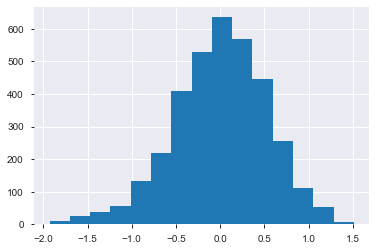

In [105]:
#Checking Errors distribution
model1_train.resid.hist(bins=15)
#model1_train.resid.to_csv("Residual.csv")--------------------------
# Residuals following Normal distribution. This is one of the Assumption in Linear Regression.

In [106]:
### Decile Analysis
#Decile analysis for validation of models - Business validation

train_reg['Deciles']=pd.qcut(train_reg['pred'],10, labels=False)
test_reg['Deciles']=pd.qcut(test_reg['pred'],10, labels=False)

In [107]:
# Decile Analysis for train data
Predicted_avg = train_reg[['Deciles','pred']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = train_reg[['Deciles','ln_Y']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['ln_Y']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

,pred,ln_Y
Deciles,,
9,6.736726,6.718143
8,6.418675,6.410800
7,6.272955,6.291316
6,6.131500,6.139638
5,6.013507,6.020923
4,5.890848,5.934818
3,5.796235,5.788901
2,5.718705,5.716867
1,5.631873,5.629840


In [108]:
# Decile Analysis for test data
Predicted_avg = test_reg[['Deciles','pred']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = test_reg[['Deciles','ln_Y']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['ln_Y']

Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test


,pred,ln_Y
Deciles,,
9,6.694072,6.660490
8,6.407976,6.420376
7,6.249883,6.186702
6,6.117307,6.105822
5,6.010883,6.048183
4,5.895029,5.920591
3,5.800641,5.849480
2,5.724845,5.724320
1,5.654285,5.668620


In [109]:
#Exporting Decile analysis in csv formate
#Decile_analysis_train.to_csv('Decile_analysis_train.csv')
#Decile_analysis_test.to_csv('Decile_analysis_test.csv')

In [110]:
predicted_avg = train_reg[['Deciles','actual_pred']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['actual_pred']
Actual_avg = train_reg[['Deciles','Total_spend']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['Total_spend']

Dec_ana_train_AP_TS = pd.concat([predicted_avg, Actual_avg], axis=1)

Dec_ana_train_AP_TS

,actual_pred,Total_spend
Deciles,,
9,856.415709,918.564478
8,614.220118,696.321166
7,530.694377,614.285126
6,460.547343,526.671530
5,409.255295,473.300456
4,361.872874,430.097998
3,329.145718,370.617776
2,304.616103,347.732952
1,279.362860,319.575383


In [111]:
predicted_avg = test_reg[['Deciles','actual_pred']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['actual_pred']
Actual_avg = test_reg[['Deciles','Total_spend']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['Total_spend']

Dec_ana_test_AP_TS = pd.concat([predicted_avg, Actual_avg], axis=1)

Dec_ana_test_AP_TS

,actual_pred,Total_spend
Deciles,,
9,817.697457,866.390685
8,607.505194,692.048965
7,518.499098,546.061555
6,453.992732,515.750683
5,408.090076,480.509268
4,363.435928,416.658954
3,330.604416,399.131400
2,306.485806,350.519070
1,285.606513,332.497419


In [112]:
#Dec_ana_train_AP_TS.to_csv('Dec_ana_train_AP_TS.csv')
#Dec_ana_test_AP_TS.to_csv('Dec_ana_test_AP_TS.csv')

In [113]:
test_reg.head(1)

,card2_3,card_4,union_1,card2_4,response_03_1,card_3,response_01_1,hometype_4,birthmonth_May,card2_5,...,card_5,reason_2,othdebt,owndvd_1,pets_saltfish,ln_Y,pred,Total_spend,actual_pred,Deciles
2706,0,0,0,1,0,0,0,0,0,0,...,0,0,0.97096,1,0,6.234509,5.922082,510.05,373.187808,4


## Machine Learning 

In [115]:
final_data_new.shape

(5000, 35)

In [118]:
#Independent columns
Ind_col = final_data_new.columns.difference(['ln_Y'])

In [120]:
Ind_col.shape

(34,)

In [124]:
#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(final_data_new[Ind_col],final_data_new.ln_Y, test_size=0.3, random_state=6)

In [177]:
train_x

,birthmonth_August,birthmonth_May,carcatvalue,card2_2,card2_3,card2_4,card2_5,card_2,card_3,card_4,...,othdebt,owndvd_1,pets_saltfish,reason_2,reason_3,response_01_1,response_02_1,response_03_1,retire_1,union_1
288,0,0,1,0,0,0,0,0,0,1,...,0.306590,1,0,0,0,0,0,0,0,0
1713,0,0,1,0,0,0,0,0,1,0,...,4.238976,1,0,0,0,0,0,0,0,0
4879,0,0,1,0,0,0,1,0,0,0,...,0.286452,0,0,0,0,0,0,0,1,0
2460,0,0,3,1,0,0,0,0,1,0,...,3.981920,1,0,0,0,0,0,0,1,1
142,0,1,3,0,0,0,0,0,0,1,...,3.797821,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0,0,1,0,0,0,1,0,1,0,...,0.587517,1,0,0,0,0,0,0,1,0
4714,0,1,1,1,0,0,0,0,1,0,...,0.395234,0,0,0,1,0,0,0,0,0
2004,0,1,1,1,0,0,0,0,0,1,...,1.012480,1,0,0,0,0,0,0,1,1
227,0,0,1,0,0,0,0,0,0,1,...,2.160816,1,0,0,0,0,1,0,1,0


In [125]:
# Importing Required Packages
from sklearn.linear_model import Ridge,Lasso

In [126]:
# Ridge Regression

In [127]:
Ridge_Reg = Ridge(alpha=0.0001,normalize=True)
Ridge_Reg.fit(train_x,train_y)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [128]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -Ridge_Reg.predict(train_x))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- Ridge_Reg.predict(test_x))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,Ridge_Reg.predict(train_x)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,Ridge_Reg.predict(test_x)))
print(RMSE_test)

MAPE values for training and testing data :
0.0728326582518857
0.06974558341102403

RMSE values for training and testing data :
0.5344870111997305
0.5120465741950073


In [129]:
# Lasso Regression :

In [130]:
Lasso_Reg = Lasso(alpha=0.0001,normalize=True)
Lasso_Reg.fit(train_x,train_y)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [131]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -Lasso_Reg.predict(train_x))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- Lasso_Reg.predict(test_x))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,Lasso_Reg.predict(train_x)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,Lasso_Reg.predict(test_x)))
print(RMSE_test)

MAPE values for training and testing data :
0.07292261526808502
0.06977960611040418

RMSE values for training and testing data :
0.5363559234006008
0.5130916481297241


### Decision Trees :

In [132]:
#Importing packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [133]:
#Model building
param_grid = {'max_depth': [5,6,7,8,9,10]}
data_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
data_tree.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [134]:
#Predicting values for both training and testing data sets
tree_train_pred= data_tree.predict(train_x)
tree_test_pred=data_tree.predict(test_x)

In [135]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -tree_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- tree_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,tree_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,tree_test_pred))
print(RMSE_test)

#correlation for training and testing sets
print("\ncorrelation for training and testing data sets:")
print(stats.stats.pearsonr(train_y,tree_train_pred))
print(stats.stats.pearsonr(test_y,tree_test_pred))


MAPE values for training and testing data :
0.07633270035439539
0.07723734030429003

RMSE values for training and testing data :
0.5644236509661783
0.5723059870207137

correlation for training and testing data sets:
(0.49779577894212224, 1.376958492035724e-218)
(0.4369187252374954, 5.847311497734329e-71)


## 2.Ensemble Learning

### 2.1 Bagging

In [136]:
#Importing required packages
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [137]:
#Model building
pargrid_ada = {'n_estimators': [50,60,70,80,100]}

gscv_bagging = GridSearchCV(estimator=BaggingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)

data_bagg =gscv_bagging.fit(train_x, train_y)

In [138]:
#Predicting values for both training and testing data sets
bagg_train_pred=data_bagg.predict(train_x)
bagg_test_pred=data_bagg.predict(test_x)

In [139]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - bagg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- bagg_test_pred)/test_y)
print(MAPE_test)


#Root Mean Squared error
print("\nMSE values for training and testing data :")
print(mean_squared_error(train_y,bagg_train_pred))
print(mean_squared_error(test_y,bagg_test_pred))

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,bagg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,bagg_test_pred))
print(RMSE_test)

#correlation for training and testing sets
print("\ncorrelation for training and testing data sets:")
print(stats.stats.pearsonr(train_y,bagg_train_pred))
print(stats.stats.pearsonr(test_y,bagg_test_pred))


MAPE values for training and testing data :
0.028885978296159635
0.07419389901730215

MSE values for training and testing data :
0.04623977203198873
0.3013636680853827

RMSE values for training and testing data :
0.21503435081862787
0.5489659990248783

correlation for training and testing data sets:
(0.9666500048585467, 0.0)
(0.4987733956006545, 3.690931067512148e-95)


### 2.2 Random Forest

In [140]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4]}

data_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)
data_rf.fit(train_x,train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
         

In [141]:
#Predicting values for both training and testing data sets
rf_train_pred=data_rf.predict(train_x)
rf_test_pred=data_rf.predict(test_x)

In [142]:
data_rf.best_params_

{'max_depth': 4, 'n_estimators': 80}

In [143]:
rf_model = RandomForestRegressor(max_depth=5,n_estimators = 100).fit(train_x,train_y)

In [144]:
train_x.columns

Index(['birthmonth_August', 'birthmonth_May', 'carcatvalue', 'card2_2',
       'card2_3', 'card2_4', 'card2_5', 'card_2', 'card_3', 'card_4', 'card_5',
       'carvalue', 'commutebike_1', 'commutemotorcycle_1', 'commutenonmotor_1',
       'commutepublic_1', 'creddebt', 'default_1', 'hometype_4', 'inccat',
       'income', 'lncardten', 'lncreddebt', 'lnothdebt', 'othdebt', 'owndvd_1',
       'pets_saltfish', 'reason_2', 'reason_3', 'response_01_1',
       'response_02_1', 'response_03_1', 'retire_1', 'union_1'],
      dtype='object')

In [145]:
rf_feature = [(i,v) for i, v in itertools.zip_longest(train_x.columns,rf_model.feature_importances_)]

In [146]:
rf_feature

[('birthmonth_August', 0.000884840432531035),
 ('birthmonth_May', 0.0041874167334932004),
 ('carcatvalue', 0.0005889897613611141),
 ('card2_2', 0.013270337398270599),
 ('card2_3', 0.01258703370565545),
 ('card2_4', 0.004558180073550965),
 ('card2_5', 0.0017432100858003458),
 ('card_2', 0.0431490112302557),
 ('card_3', 0.05106163561092206),
 ('card_4', 0.06245271935278418),
 ('card_5', 0.0009785069289326828),
 ('carvalue', 0.028647506061685278),
 ('commutebike_1', 0.0008081829340939986),
 ('commutemotorcycle_1', 0.0015893361488244892),
 ('commutenonmotor_1', 0.001196647627270797),
 ('commutepublic_1', 0.0004548634967370893),
 ('creddebt', 0.019964518134022658),
 ('default_1', 0.0010854662864960866),
 ('hometype_4', 0.0013250361407397251),
 ('inccat', 0.027725570908129344),
 ('income', 0.5785042550417225),
 ('lncardten', 0.03406316994863967),
 ('lncreddebt', 0.021877936630377376),
 ('lnothdebt', 0.012574748011216177),
 ('othdebt', 0.012857887859162203),
 ('owndvd_1', 0.001097812072296686

In [147]:
rf_feature_import = pd.DataFrame(rf_feature, columns=['feature','importance'])
rf_feature_import.sort_values('importance',inplace = True,ascending=False)
rf_feature_import.head(15)

,feature,importance
20,income,0.578504
9,card_4,0.062453
27,reason_2,0.052185
8,card_3,0.051062
7,card_2,0.043149
21,lncardten,0.034063
11,carvalue,0.028648
19,inccat,0.027726
22,lncreddebt,0.021878
16,creddebt,0.019965


In [148]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - rf_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- rf_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,rf_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,rf_test_pred))
print(RMSE_test)

#correlation for training and testing sets
print("\ncorrelation for training and testing data sets:")
print(stats.stats.pearsonr(train_y,rf_train_pred))
print(stats.stats.pearsonr(test_y,rf_test_pred))

MAPE values for training and testing data :
0.07723276463410478
0.07500128710509142

RMSE values for training and testing data :
0.57038048212461
0.5547687652145055

correlation for training and testing data sets:
(0.4896064762104225, 1.853615674986779e-210)
(0.4803153809815366, 2.0706996324081983e-87)


### 2.3 Boosting

#### Ada Boost

In [149]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_boost=gscv_ada.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   23.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [150]:
#Predicting values for both training and testing data sets
boost_train_pred=data_boost.predict(train_x)
boost_test_pred=data_boost.predict(test_x)

In [151]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - boost_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- boost_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,boost_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,boost_test_pred))
print(RMSE_test)

#correlation for training and testing sets
print("\ncorrelation for training and testing data sets:")
print(stats.stats.pearsonr(train_y,boost_train_pred))
print(stats.stats.pearsonr(test_y,boost_test_pred))

MAPE values for training and testing data :
0.0782438810566021
0.0756853647524054

RMSE values for training and testing data :
0.5798544773121205
0.5615723247783012

correlation for training and testing data sets:
(0.4768974089494479, 2.839985109241322e-198)
(0.46705024758032715, 3.9721489748374786e-82)


#### Gradient boost

In [152]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'max_depth':[2,3,4,5],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_ada = GridSearchCV(estimator=GradientBoostingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_gbm=gscv_ada.fit(train_x, train_y)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  1.2min finished


In [153]:
#Predicting values for both training and testing data sets
gbm_train_pred=data_gbm.predict(train_x)
gbm_test_pred=data_gbm.predict(test_x)

In [154]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - gbm_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- gbm_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,gbm_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,gbm_test_pred))
print(RMSE_test)

#correlation for training and testing sets
print("\ncorrelation for training and testing data sets:")
print(stats.stats.pearsonr(train_y,gbm_train_pred))
print(stats.stats.pearsonr(test_y,gbm_test_pred))

MAPE values for training and testing data :
0.06921489201360473
0.07066318653980126

RMSE values for training and testing data :
0.5093636570998414
0.51994595422943

correlation for training and testing data sets:
(0.6317358949093432, 0.0)
(0.5681501275804464, 5.870131601738797e-129)


#### XGBoost

In [155]:
#pip install xgboost

In [156]:
#Importing Required packages
import xgboost
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor

In [157]:
pargrid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1)

data_xg=gscv_xg.fit(train_x, train_y)

[14:35:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [158]:
#Predicting values for both training and testing data sets
xg_train_pred=data_xg.predict(train_x)
xg_test_pred=data_xg.predict(test_x)

In [159]:
data_xg.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [160]:
xg_model = xgboost.XGBRegressor(max_depth=5,n_estimators = 100).fit(train_x,train_y)

[14:35:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [161]:
train_x.columns

Index(['birthmonth_August', 'birthmonth_May', 'carcatvalue', 'card2_2',
       'card2_3', 'card2_4', 'card2_5', 'card_2', 'card_3', 'card_4', 'card_5',
       'carvalue', 'commutebike_1', 'commutemotorcycle_1', 'commutenonmotor_1',
       'commutepublic_1', 'creddebt', 'default_1', 'hometype_4', 'inccat',
       'income', 'lncardten', 'lncreddebt', 'lnothdebt', 'othdebt', 'owndvd_1',
       'pets_saltfish', 'reason_2', 'reason_3', 'response_01_1',
       'response_02_1', 'response_03_1', 'retire_1', 'union_1'],
      dtype='object')

In [162]:
xg_feature = [(i,v) for i, v in itertools.zip_longest(train_x.columns,xg_model.feature_importances_)]

In [163]:
xg_feature

[('birthmonth_August', 0.006756091),
 ('birthmonth_May', 0.013714263),
 ('carcatvalue', 0.003855887),
 ('card2_2', 0.02796999),
 ('card2_3', 0.03218152),
 ('card2_4', 0.01944014),
 ('card2_5', 0.040935665),
 ('card_2', 0.05004687),
 ('card_3', 0.06151594),
 ('card_4', 0.05831902),
 ('card_5', 0.07649438),
 ('carvalue', 0.016272329),
 ('commutebike_1', 0.014466814),
 ('commutemotorcycle_1', 0.017691862),
 ('commutenonmotor_1', 0.0158466),
 ('commutepublic_1', 0.018845268),
 ('creddebt', 0.018433321),
 ('default_1', 0.0128083965),
 ('hometype_4', 0.018561978),
 ('inccat', 0.14896171),
 ('income', 0.07875209),
 ('lncardten', 0.016238684),
 ('lncreddebt', 0.0),
 ('lnothdebt', 0.019060623),
 ('othdebt', 0.0),
 ('owndvd_1', 0.017508728),
 ('pets_saltfish', 0.009286739),
 ('reason_2', 0.048196267),
 ('reason_3', 0.0632111),
 ('response_01_1', 0.016955117),
 ('response_02_1', 0.017132992),
 ('response_03_1', 0.013135455),
 ('retire_1', 0.014145731),
 ('union_1', 0.013258428)]

In [164]:
xg_feature_import = pd.DataFrame(xg_feature, columns=['feature','importance'])
xg_feature_import.sort_values('importance',inplace = True,ascending=False)
xg_feature_import.head(15)

,feature,importance
19,inccat,0.148962
20,income,0.078752
10,card_5,0.076494
28,reason_3,0.063211
8,card_3,0.061516
9,card_4,0.058319
7,card_2,0.050047
27,reason_2,0.048196
6,card2_5,0.040936
4,card2_3,0.032182


In [165]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - xg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- xg_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,xg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,xg_test_pred))
print(RMSE_test)

#correlation for training and testing sets
print("\ncorrelation for training and testing data sets:")
print(stats.stats.pearsonr(train_y,xg_train_pred))
print(stats.stats.pearsonr(test_y,xg_test_pred))



MAPE values for training and testing data :
0.06961914589968349
0.0703970318068836

RMSE values for training and testing data :
0.5128223183906281
0.5188675501145322

correlation for training and testing data sets:
(0.6242454830950462, 0.0)
(0.5712436362339093, 1.1717193562849315e-130)


### K - Nearest Neighbours

In [166]:
#Importing required modules
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [167]:
#Standardising the data because KNN is distance based algorithm 
scaler = StandardScaler()
train_X = scaler.fit_transform(train_x)
test_X = scaler.fit_transform(test_x)

In [168]:
#Model Building using different tuning parameters
tuned_parameters = [{'n_neighbors': [5, 7, 9,10,],
                    'leaf_size':[30,40,50,60]}]

knn_reg = GridSearchCV(KNeighborsRegressor(),
                   tuned_parameters,
                   cv=3)

data_knn = knn_reg.fit(train_X,train_y)

In [169]:
#Predicting values for both training and testing data sets
knn_train_pred=data_knn.predict(train_X)
knn_test_pred=data_knn.predict(test_X)

In [170]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - knn_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- knn_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,knn_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,knn_test_pred))
print(RMSE_test)

#correlation for training and testing sets
print("\ncorrelation for training and testing data sets:")
print(stats.stats.pearsonr(train_y,knn_train_pred))
print(stats.stats.pearsonr(test_y,knn_test_pred))

MAPE values for training and testing data :
0.0732949329554268
0.07897207969624179

RMSE values for training and testing data :
0.5402130243018074
0.5811199896822129

correlation for training and testing data sets:
(0.5614874077967638, 5.079736806518428e-290)
(0.4019872534359208, 2.375937836072549e-59)


## ANN(Artificial Neural Network)

In [173]:
#Importing required Module
from sklearn.neural_network import MLPRegressor

In [174]:
pargrid_ann = {'activation': ['relu','tanh','logistic','identity'],
               'alpha':[0.0001,0.001,0.01,1,10,100,1000]}

ann_reg = GridSearchCV(MLPRegressor(),pargrid_ann,cv=3)

data_ann = ann_reg.fit(train_X,train_y)

In [175]:
#Predicting values for both training and testing data sets
ann_train_pred=data_ann.predict(train_X)
ann_test_pred=data_ann.predict(test_X)

In [176]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - ann_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- ann_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,ann_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,ann_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.0727623274919518
0.06984921771328176

RMSE values for training and testing data :
0.533765244712023
0.512465973105041


## SVM(Support Vector Machine) 

In [171]:
#Importing required modules
from sklearn.svm import SVR
from sklearn.svm import LinearSVR 

In [ ]:
#Model building using Linear svm 
tuned_parameters = [{'C': [1,0.1,0.001,10,100],
                    'gamma':[0.0001, 0.001, 0.01, 0.1],
                    'kernel':['linear','rbf','poly']}]

svr_reg = GridSearchCV(SVR(),
                   tuned_parameters,
                   cv=3)

data_svr = svr_reg.fit(train_X,train_y)

In [ ]:
#Predicting values for both training and testing data sets
L_svr_train_pred=data_svr.predict(train_x)
L_svr_test_pred=data_svr.predict(test_x)

In [ ]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - L_svr_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- L_svr_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,L_svr_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,L_svr_test_pred))
print(RMSE_test)